In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Classified Data', index_col = 0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.shape

(1000, 11)

In [5]:
X = df.drop('TARGET CLASS', axis = 1)
y = df['TARGET CLASS']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
KNN = KNeighborsClassifier()

In [10]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [11]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_preds = KNN.predict(X_test)

In [13]:
y_preds

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [14]:
KNN.score(X_train, y_train)

0.95

In [15]:
KNN.score(X_test, y_test)

0.96

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.96      0.96      0.96       112

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [18]:
print(confusion_matrix(y_test, y_preds))

[[ 84   4]
 [  4 108]]


In [19]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    preds_i = knn.predict(X_test)
    error_rate.append(np.mean(preds_i != y_test))

Text(0, 0.5, 'Error Rate')

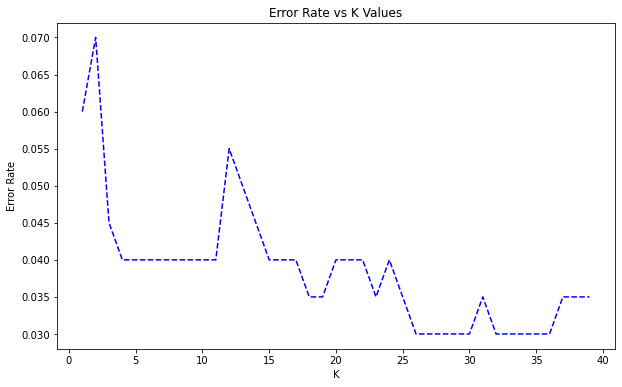

In [20]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color= 'blue', linestyle = 'dashed')
plt.title('Error Rate vs K Values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
knn = KNeighborsClassifier(n_neighbors= 27)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
print(classification_report(y_test, y_preds))
print('\n')
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.97      0.97      0.97       112

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



[[ 85   3]
 [  3 109]]


In [25]:
knn = KNeighborsClassifier(n_neighbors= 30)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
print(classification_report(y_test, y_preds))
print('\n')
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.97      0.97      0.97       112

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



[[ 85   3]
 [  3 109]]


In [27]:
knn = KNeighborsClassifier(n_neighbors= 35)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
print(classification_report(y_test, y_preds))
print('\n')
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.97      0.97      0.97       112

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



[[ 85   3]
 [  3 109]]
